## Paquetes Basicos

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Normalizar el tamaño de las imagenes

In [3]:
input_dir = r"..\data\raw"
categories = ['sin_plaga_processed', 'plaga_processed']

data_sin_plagas = []
data_plagas = []
labels_sin_plagas = []
labels_plagas = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)

        img = cv2.imread(img_path) 
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        scaled_image = cv2.resize(src=image_rgb,  
                          dsize=(640, 640))
        if category == 'sin_plaga_processed':
            data_sin_plagas.append(scaled_image.flatten())
            labels_sin_plagas.append(category_idx)
        else:
            data_plagas.append(scaled_image.flatten())
            labels_plagas.append(category_idx)

data_sin_plagas = np.asarray(data_sin_plagas)
labels_sin_plagas = np.asarray(labels_sin_plagas)
data_plagas = np.asarray(data_plagas)
labels_plagas = np.asarray(labels_plagas)

## Entrenar el modelo de regresión lógistica

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
matrices_confusion_por_iteracion = []
matrices_confusion_por_iteracion_test = []

# Repetir el proceso de entrenamiento y evaluación 10 veces
for _ in range(10):
    # Realizar subsampling en ambas clases (mayoritaria y minoritaria)
    indices_resample = np.random.choice(len(data_plagas), size=50, replace=True)
    indices_resample_sin = np.random.choice(len(data_sin_plagas), size=50, replace=True)
    
    data_plagas_resample = np.asarray(data_plagas)[indices_resample]
    labels_plagas_resample = np.asarray(labels_plagas)[indices_resample]

    data_sin_plagas_resample = np.asarray(data_sin_plagas)[indices_resample_sin]
    labels_sin_plagas_resample = np.asarray(labels_sin_plagas)[indices_resample_sin]

    # Combinar datos de 'sin_plaga' y de 'plaga'
    data_resample = np.concatenate([data_sin_plagas_resample, data_plagas_resample])
    labels_resample = np.concatenate([labels_sin_plagas_resample, labels_plagas_resample])

    # Dividir los datos en conjuntos de entrenamiento y resto (validación y prueba)
    x_train, x_rest, y_train, y_rest = train_test_split(
        data_resample, labels_resample, test_size=0.2, shuffle=True
    )

    # Dividir los datos en conjuntos de validación y prueba
    x_val, x_test, y_val, y_test = train_test_split(
        x_rest, y_rest, test_size=0.5, shuffle=True
    )

    # Inicializar el modelo de regresión logística
    modelo = LogisticRegression()

    # Entrenar el modelo
    modelo.fit(x_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = modelo.predict(x_val)

    # Realizar predicciones en el conjunto de prueba
    y_pred_test = modelo.predict(x_test)

    # Calcular las matrices de confusión y almacenarla para los conjuntos de validación y prueba
    matriz_confusion = confusion_matrix(y_val, y_pred)
    matriz_confusion_test = confusion_matrix(y_test, y_pred_test)
    matrices_confusion_por_iteracion.append(matriz_confusion)
    matrices_confusion_por_iteracion_test.append(matriz_confusion_test)

## Evaluación de desempeño (conjunto de validación)

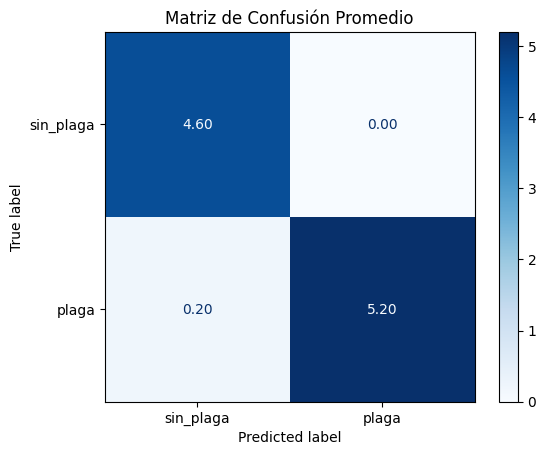

Accuracy promedio en 10 ejecuciones: 98.00000000000001
Precision promedio en 10 ejecuciones: 100.0
Recall promedio en 10 ejecuciones: 95.83333333333333


In [8]:
matriz_confusion_promedio = np.mean(matrices_confusion_por_iteracion, axis=0)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_promedio, display_labels=['sin_plaga', 'plaga'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Extraer TP, FP, FN, TN
TP = matriz_confusion_promedio[0, 0]
FP = matriz_confusion_promedio[0, 1]
FN = matriz_confusion_promedio[1, 0]
TN = matriz_confusion_promedio[1, 1]

# Calcular el Accuracy, Precision y Recall
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Accuracy promedio en 10 ejecuciones: {accuracy*100}')
print(f'Precision promedio en 10 ejecuciones: {precision*100}')
print(f'Recall promedio en 10 ejecuciones: {recall*100}')

## Evaluación de desempeño (conjunto de prueba)

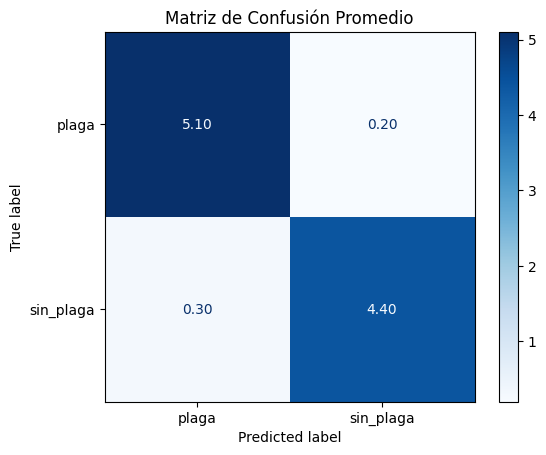

Accuracy promedio en 10 ejecuciones: 95.0
Precision promedio en 10 ejecuciones: 96.22641509433963
Recall promedio en 10 ejecuciones: 94.44444444444444


In [9]:
matriz_confusion_promedio = np.mean(matrices_confusion_por_iteracion_test, axis=0)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_promedio, display_labels=['plaga', 'sin_plaga'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Extraer TP, FP, FN, TN
TP = matriz_confusion_promedio[0, 0]
FP = matriz_confusion_promedio[0, 1]
FN = matriz_confusion_promedio[1, 0]
TN = matriz_confusion_promedio[1, 1]

# Calcular el Accuracy, Precision y Recall
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)


print(f'Accuracy promedio en 10 ejecuciones: {accuracy*100}')
print(f'Precision promedio en 10 ejecuciones: {precision*100}')
print(f'Recall promedio en 10 ejecuciones: {recall*100}')